In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer CSV

In [7]:
df= pd.read_csv("listings_tokyo_original.csv")
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20241230011552,2024-12-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.84,4.56,4.80,M130003350,f,1,1,0,0,1.13
1,776070,https://www.airbnb.com/rooms/776070,20241230011552,2024-12-30,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.84,4.92,M130000243,f,1,0,1,0,1.79
2,905944,https://www.airbnb.com/rooms/905944,20241230011552,2024-12-30,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.91,4.78,4.78,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,8,8,0,0,1.69
3,1016831,https://www.airbnb.com/rooms/1016831,20241230011552,2024-12-30,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.90,M130001107,f,1,0,1,0,1.90
4,1196177,https://www.airbnb.com/rooms/1196177,20241230011552,2024-12-30,city scrape,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.92,4.74,4.82,M130007760,f,1,0,1,0,0.97


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21058 entries, 0 to 21057
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21058 non-null  int64  
 1   listing_url                                   21058 non-null  object 
 2   scrape_id                                     21058 non-null  int64  
 3   last_scraped                                  21058 non-null  object 
 4   source                                        21058 non-null  object 
 5   name                                          21058 non-null  object 
 6   description                                   20716 non-null  object 
 7   neighborhood_overview                         12731 non-null  object 
 8   picture_url                                   21058 non-null  object 
 9   host_id                                       21058 non-null 

# Reemplazar Valores Nulos

In [9]:
df_cuanti=df.select_dtypes(include=["float64","int64","float","int"])
df_cuali=df.select_dtypes(include=["object","datetime","category"])

cuantias_mean=df_cuanti.fillna(round(df_cuanti.mean(),1))
cualis_bfill=df_cuali.fillna(method="bfill")
cualis_ffill=df_cuanti.fillna(method="ffill")

df_casi_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)
df_sin_nulos = df_casi_sin_nulos.drop(columns=['neighbourhood_group_cleansed'])
df_sin_nulos

/var/folders/tr/mry98_7x4ml8xx_5s0mpz0pw0000gn/T/ipykernel_20705/3806306996.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=df_cuali.fillna(method="bfill")
/var/folders/tr/mry98_7x4ml8xx_5s0mpz0pw0000gn/T/ipykernel_20705/3806306996.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=df_cuanti.fillna(method="ffill")


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,20241230011552,964081,1.0,2.0,35.717070,139.826080,2,1.0,1.0,...,4.91,4.85,4.84,4.56,4.80,1,1,0,0,1.13
1,776070,20241230011552,801494,1.0,6.0,35.738440,139.769170,1,1.0,1.0,...,4.92,4.98,4.98,4.84,4.92,1,0,1,0,1.79
2,905944,20241230011552,4847803,9.0,18.0,35.678780,139.678470,6,1.5,2.0,...,4.79,4.87,4.91,4.78,4.78,8,8,0,0,1.69
3,1016831,20241230011552,5596383,1.0,6.0,35.658000,139.671340,2,1.0,1.0,...,4.84,4.94,4.98,4.92,4.90,1,0,1,0,1.90
4,1196177,20241230011552,5686404,1.0,2.0,35.743630,139.798520,3,1.5,1.0,...,4.79,4.94,4.92,4.74,4.82,1,0,1,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,1318814961432616144,20241230011552,564793249,4.0,9.0,35.736506,139.732397,2,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,4,4,0,0,1.00
21054,1318818845388469194,20241230011552,667881905,14.0,14.0,35.700940,139.704670,2,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,11,11,0,0,1.00
21055,1318819693625244360,20241230011552,564793249,4.0,9.0,35.736653,139.733272,2,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,4,4,0,0,1.00
21056,1318896364828476774,20241230011552,533627789,3.0,4.0,35.672174,139.660086,5,1.0,2.0,...,5.00,5.00,5.00,5.00,5.00,3,3,0,0,1.00


# Eliminar Outliers

In [10]:
cuantitativas=df.select_dtypes(include=["float64","int64","float","int"])
cualitativas=df.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/197677,2024-12-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1.13
1,https://www.airbnb.com/rooms/776070,2024-12-30,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,1.79
2,https://www.airbnb.com/rooms/905944,2024-12-30,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,...,NaN,NaN,NaN,NaN,NaN,8,8,0,0,1.69
3,https://www.airbnb.com/rooms/1016831,2024-12-30,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,https://www.airbnb.com/users/show/5596383,Wakana,2013-03-24,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,1.90
4,https://www.airbnb.com/rooms/1196177,2024-12-30,city scrape,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,https://www.airbnb.com/rooms/1318814961432616144,2024-12-30,city scrape,#34新筑公寓 山手线车站徒步7分钟 直达新宿 池袋 秋叶原等,This centrally located place is a peaceful esc...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/564793249,照颖,2024-03-01,...,NaN,NaN,NaN,NaN,NaN,4,4,0,0,1.00
21054,https://www.airbnb.com/rooms/1318818845388469194,2024-12-30,city scrape,新宿中心 | 舒适的客房、齐全的设施、便利的交通、距离山手线新大久保站7分钟,Great ★location<br />10 minutes walk from the ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/667881905,Akemi,2024-12-20,...,NaN,NaN,NaN,NaN,NaN,11,11,0,0,1.80
21055,https://www.airbnb.com/rooms/1318819693625244360,2024-12-30,city scrape,#43 新筑公寓 山手线车站徒步8分钟 直达新宿 涉谷 秋叶原等,This centrally located place is a peaceful esc...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,https://www.airbnb.com/users/show/564793249,照颖,2024-03-01,...,NaN,NaN,NaN,NaN,NaN,4,4,0,0,1.80
21056,https://www.airbnb.com/rooms/1318896364828476774,2024-12-30,city scrape,渋谷14分/新宿6分/代田橋駅3分/都心アクセス抜群の快適ステイ,The apartment is 3 minutes from the nearest st...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/533627789,Manabu,2023-08-24,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,1.80


# Preparación de las Variables

In [11]:
frecuencia_rt = df["room_type"].value_counts().reset_index()
frecuencia_rt.columns = ["room_type", "Frecuencia"]
frecuencia_rt

,room_type,Frecuencia
0,Entire home/apt,17513
1,Private room,3231
2,Shared room,179
3,Hotel room,135


In [12]:
df["room_type"]=df["room_type"].str.replace("Entire home/apt","1")
df["room_type"]=df["room_type"].str.replace("Private room","2")
df["room_type"]=df["room_type"].str.replace("Shared room","3")
df["room_type"]=df["room_type"].str.replace("Hotel room","4")
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20241230011552,2024-12-30,city scrape,Oshiage Holiday Apartment,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.84,4.56,4.80,M130003350,f,1,1,0,0,1.13
1,776070,https://www.airbnb.com/rooms/776070,20241230011552,2024-12-30,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.84,4.92,M130000243,f,1,0,1,0,1.79
2,905944,https://www.airbnb.com/rooms/905944,20241230011552,2024-12-30,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.91,4.78,4.78,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,8,8,0,0,1.69
3,1016831,https://www.airbnb.com/rooms/1016831,20241230011552,2024-12-30,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.90,M130001107,f,1,0,1,0,1.90
4,1196177,https://www.airbnb.com/rooms/1196177,20241230011552,2024-12-30,city scrape,Homestay at Host's House - Senju-Ohashi Station,Our accommodation offers: <br /><br />1. **Gr...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.92,4.74,4.82,M130007760,f,1,0,1,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,1318814961432616144,https://www.airbnb.com/rooms/1318814961432616144,20241230011552,2024-12-30,city scrape,#34新筑公寓 山手线车站徒步7分钟 直达新宿 池袋 秋叶原等,This centrally located place is a peaceful esc...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,564793249,...,5.00,5.00,5.00,M130003233,t,4,4,0,0,1.00
21054,1318818845388469194,https://www.airbnb.com/rooms/1318818845388469194,20241230011552,2024-12-30,city scrape,新宿中心 | 舒适的客房、齐全的设施、便利的交通、距离山手线新大久保站7分钟,Great ★location<br />10 minutes walk from the ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,667881905,...,NaN,NaN,NaN,M130044711,t,11,11,0,0,NaN
21055,1318819693625244360,https://www.airbnb.com/rooms/1318819693625244360,20241230011552,2024-12-30,city scrape,#43 新筑公寓 山手线车站徒步8分钟 直达新宿 涉谷 秋叶原等,This centrally located place is a peaceful esc...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,564793249,...,NaN,NaN,NaN,M130003235,t,4,4,0,0,NaN
21056,1318896364828476774,https://www.airbnb.com/rooms/1318896364828476774,20241230011552,2024-12-30,city scrape,渋谷14分/新宿6分/代田橋駅3分/都心アクセス抜群の快適ステイ,The apartment is 3 minutes from the nearest st...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,533627789,...,NaN,NaN,NaN,Hotels and Inns Business Act | 世田谷区世田谷保健所 | 6世...,t,3,3,0,0,NaN


In [13]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype(float)
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/tr/mry98_7x4ml8xx_5s0mpz0pw0000gn/T/ipykernel_20705/1743048641.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
correlacion_prueba = df[["host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness","price","availability_365","number_of_reviews","reviews_per_month","room_type"]]
correlacion_prueba

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,room_type
0,93.0,100.0,4.56,4.91,13000.0,156,183,1.13,1
1,100.0,100.0,4.84,4.92,9474.0,209,264,1.79,2
2,100.0,100.0,4.78,4.79,39363.0,273,242,1.69,1
3,100.0,100.0,4.92,4.84,26571.0,46,271,1.90,2
4,92.0,100.0,4.74,4.79,10571.0,69,135,0.97,2
...,...,...,...,...,...,...,...,...,...
21053,100.0,100.0,5.00,5.00,12000.0,48,1,1.00,1
21054,100.0,100.0,NaN,NaN,15548.0,128,0,NaN,1
21055,100.0,100.0,NaN,NaN,12000.0,61,0,NaN,1
21056,100.0,100.0,NaN,NaN,16183.0,312,0,NaN,1


In [15]:
correlacion_prueba = correlacion_prueba.apply(pd.to_numeric, errors="coerce")
correlacion_prueba

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,room_type
0,93.0,100.0,4.56,4.91,13000.0,156,183,1.13,1
1,100.0,100.0,4.84,4.92,9474.0,209,264,1.79,2
2,100.0,100.0,4.78,4.79,39363.0,273,242,1.69,1
3,100.0,100.0,4.92,4.84,26571.0,46,271,1.90,2
4,92.0,100.0,4.74,4.79,10571.0,69,135,0.97,2
...,...,...,...,...,...,...,...,...,...
21053,100.0,100.0,5.00,5.00,12000.0,48,1,1.00,1
21054,100.0,100.0,NaN,NaN,15548.0,128,0,NaN,1
21055,100.0,100.0,NaN,NaN,12000.0,61,0,NaN,1
21056,100.0,100.0,NaN,NaN,16183.0,312,0,NaN,1


In [16]:
rr1 = 1
rr2= 2
rr3 = 3
rr4 = 4
Entire_homeapt = correlacion_prueba[correlacion_prueba["room_type"] == rr1]
Private_room = correlacion_prueba[correlacion_prueba["room_type"] == rr2]
Shared_room = correlacion_prueba[correlacion_prueba["room_type"] == rr3]
Hotel_room = correlacion_prueba[correlacion_prueba["room_type"] == rr4]

# Correlaciones Simples

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

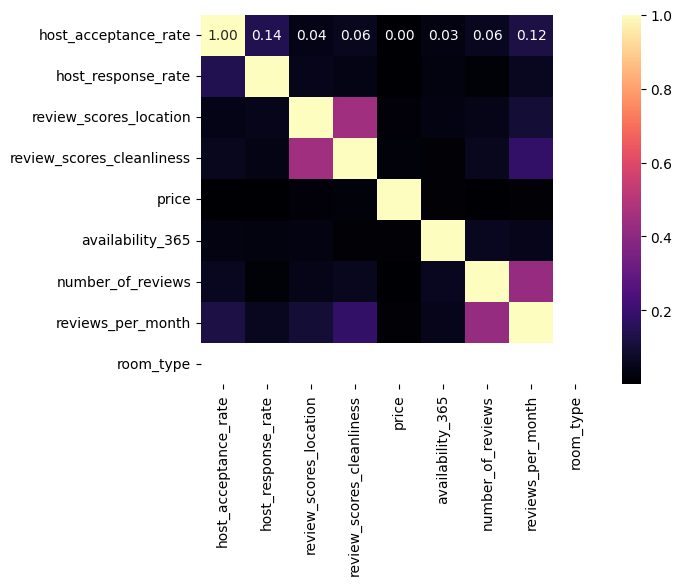

In [17]:
Corr_Factors=Entire_homeapt.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_EHA=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_EHA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

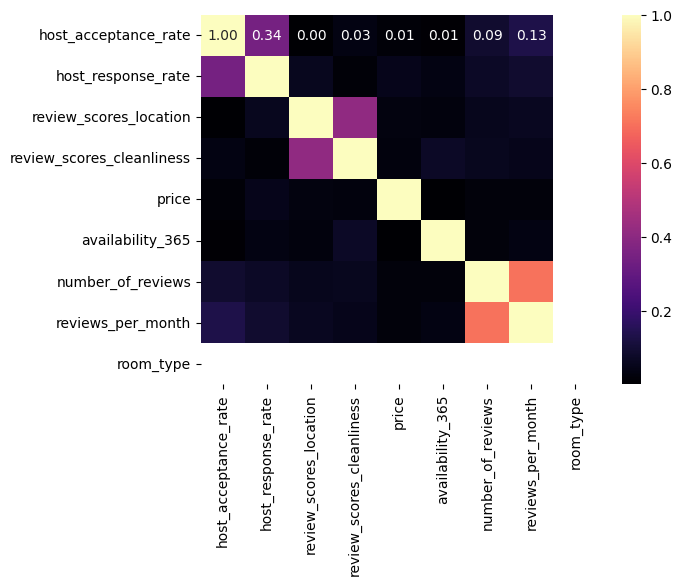

In [18]:
Corr_Factors=Private_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_PR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_PR

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

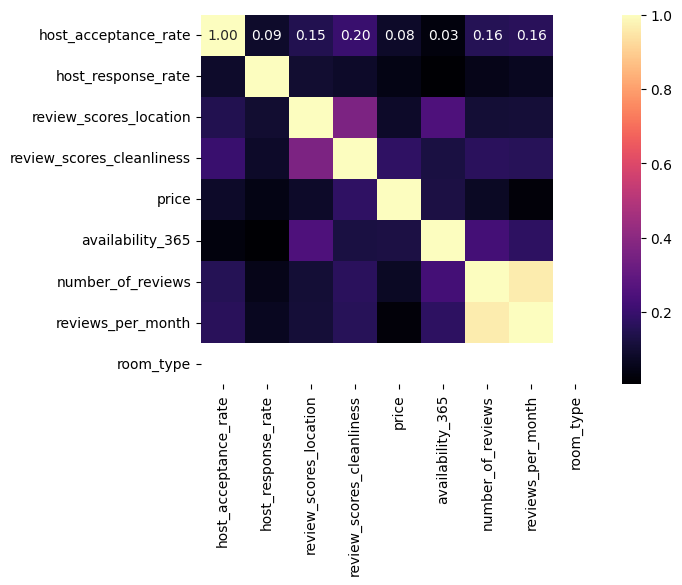

In [19]:
Corr_Factors=Hotel_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_HR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_HR

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

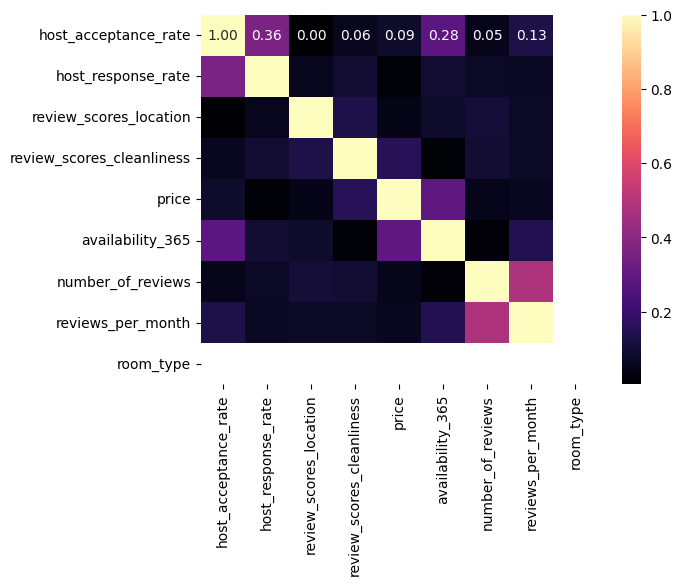

In [20]:
Corr_Factors=Shared_room.corr()
Corr_Factors1=abs(Corr_Factors)
Heat_Map_SR=sns.heatmap(Corr_Factors1,cmap="magma",annot=True,fmt=".2f")
Heat_Map_SR

# Correlación y Determinación

In [21]:
Vars_Indep=correlacion_prueba[["host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness","price","availability_365","number_of_reviews","reviews_per_month"]]
Var_Dep= correlacion_prueba['room_type']

In [23]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(Vars_Indep, Var_Dep)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [25]:
imputer = SimpleImputer(strategy='mean')

In [26]:
X_imputed = imputer.fit_transform(Vars_Indep)

In [27]:
model = LinearRegression()
model.fit(X_imputed, Var_Dep)

LinearRegression()

# Heat Maps

# Modelo Regresión Lineal Múltiple